In [1]:
def scatter_plot_r(x, 
                   y, 
                   title_label, 
                   x_label, 
                   y_label):
    """"Plota um gráfico de linhas com dados de previsão e de teste. 
    Args:
          x: variavel independente
          y: variavel dependente
          title_label(str): título do gráfico.
          x_label(str): Nome do label do eixo X.
          y_label(str): Nome do label do eixo Y.
    """
    #Calcula o coef. de Correlação
    pearson = stats.pearsonr(df["GrLivArea"],df["SalePrice"])[0]

    # Determina o estilo
    sns.set_style("white", {"axes.facecolor": ".95"}) 
    # Determina o tamanho do gráfico.
    sns.set(rc={'figure.figsize':(8,6)})  
    plt.rcParams["axes.labelsize"] = 6

    #plota o gráfico
    ax = sns.regplot(x=df["GrLivArea"],
                     y=df["SalePrice"],
                     robust = False, # True: ignora os outliers,demora mais para calcular a regressão linear
                     scatter_kws={"color":'#5eaaa8',"alpha":0.2,"s":50},
                     line_kws={"color":'#eb5e0b',"alpha":0.9,"lw":1},
                     label="Coeficiente de Correlação = {0:.2f}".format(pearson))

    #local da legenda
    ax.legend(loc="best")
    #plota titulo
    ax.set_title(title_label, size = 22)
    #plota eixo x
    ax.set_xlabel(x_label, horizontalalignment='left', x=0, size = 18)
    #plota eixo y
    ax.set_ylabel(y_label,horizontalalignment='left', y=0, size = 18)
    #plota grid
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    #retira as linhas que delimitam o gráfico
    sns.despine(top=True, right=True, left=True, bottom=True)
    #seta o Zero como limite
    plt.ylim(ymin=0)  
    #Mostra o gráfico
    plt.show()

In [2]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [3]:
# Dados para testar as funções
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy import stats


In [4]:
#localização dos dados
path_input = r"C:\Users\MarceloPereiraMarcoP\Desktop\DataViz\house-prices-advanced-regression-techniques"
#link dos dados
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

In [5]:
#Carregando os dados
data = pd.read_csv(path_input + "/train.csv")

In [6]:
#Selecionando duas variaveis
df = data[["GrLivArea","SalePrice"]]

#transormando para m2 e milhares(para facilitar a leitura)
df["SalePrice"] = df["SalePrice"] /1000
df["GrLivArea"] = df["GrLivArea"] /10.764

In [7]:
#checagem dos valores, 1460 registros
df.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,140.790013,180.921196
std,48.818319,79.442503
min,31.029357,34.900000
25%,104.933110,129.975000
50%,136.008919,163.000000
75%,165.064103,214.000000
max,524.154589,755.000000


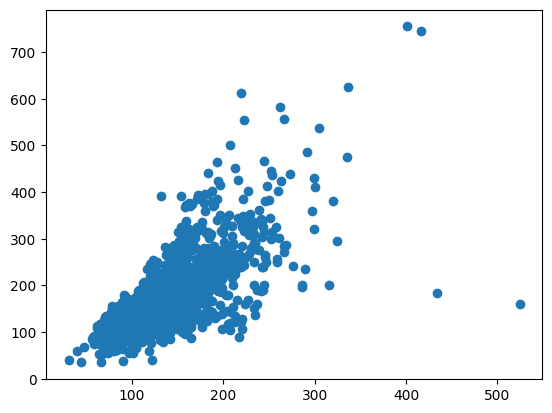

In [8]:
#Plotar o gráfico padrão para comparar
plt.rcdefaults()
plt.plot( 'GrLivArea','SalePrice',  data=df, linestyle='none', marker='o')
plt.show()

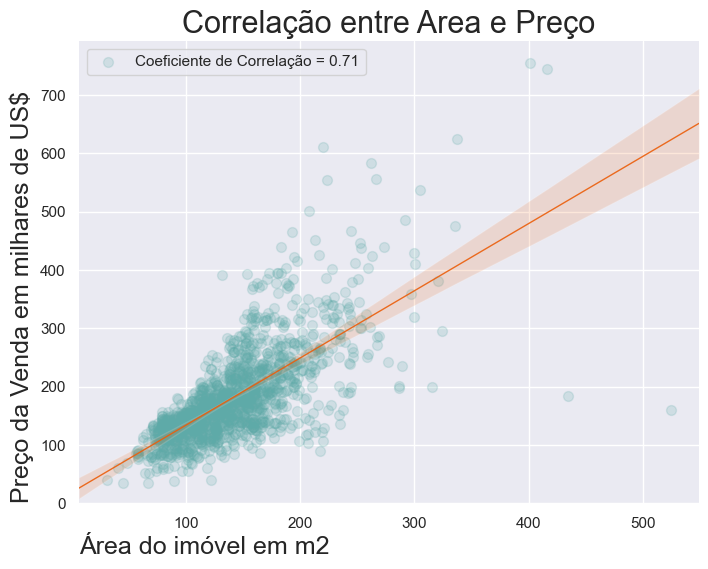

In [11]:
#chamando a função
scatter_plot_r(df["GrLivArea"], 
               df["SalePrice"], 
               "Correlação entre Area e Preço", 
               "Área do imóvel em m2", 
               "Preço da Venda em milhares de US$")